# Building a stock price database

In this notebook we will download historic data for all SPY symbols and build a database of prices. For this we will use HDF5 format which is supported by pandas. 

As an example let's take the [SPY components](https://www.spdrs.com/product/fund.seam?ticker=SPY). The excel sheet can be downloaded from [here](https://www.spdrs.com/site-content/xls/SPY_All_Holdings.xls?fund=SPY&docname=All+Holdings&onyx_code1=1286&onyx_code2=1700), or even better, download it automatically. The following piece of code will do just that, unless you're behind a proxy.

In [1]:
%pylab inline
%run common.py

Populating the interactive namespace from numpy and matplotlib


In [2]:
import urllib.request
import os

fName = 'data/spy_holdings.xls'

if not os.path.exists('data'): os.mkdir('data') # create data directory if it does not exist
urllib.request.urlretrieve ("https://www.spdrs.com/site-content/xls/SPY_All_Holdings.xls?fund=SPY&docname=All+Holdings&onyx_code1=1286&onyx_code2=1700",
                             fName) # download xls file and save it to data directory




('data/spy_holdings.xls', <http.client.HTTPMessage at 0x7f47fcf6be80>)

Now we'll read the symbols from xls file. I have already taken a look at it and know that the data is contained in rows 5-505. pandas supports [reading excel files](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) . `header` and `skip_footer` parameters are used to correctly parse header row and discard irrelevant data at the end of the sheet.

[ref]: # (data io - excel files)

<div class="alert alert-info">
**note:**

  The [xlrd](http://xlrd.readthedocs.io/en/latest/) module provides a flexible way of working with xls files. Each cell can be accessed individually

</div>

We'll now parse this file in a similar way we parsed a csv file in the previous excersise, putting the relevant data to a `DataFrame`

In [3]:
import pandas as pd

holdings = pd.read_excel(fName, header=3, skip_footer=11) 
holdings

,Name,Identifier,Weight,Sector,Shares Held
0,Apple Inc.,AAPL,3.88e+00,Information Technology,5.87e+07
1,Microsoft Corporation,MSFT,3.11e+00,Information Technology,8.82e+07
2,Amazon.com Inc.,AMZN,2.65e+00,Consumer Discretionary,4.57e+06
3,Facebook Inc. Class A,FB,1.86e+00,Information Technology,2.73e+07
4,JPMorgan Chase & Co.,JPM,1.70e+00,Financials,3.97e+07
...,...,...,...,...,...
502,Signet Jewelers Limited,SIG,1.23e-02,Consumer Discretionary,6.87e+05
503,Under Armour Inc. Class C,UA,1.17e-02,Consumer Discretionary,2.05e+06
504,Chesapeake Energy Corporation,CHK,1.15e-02,Energy,1.04e+07
505,Patterson Companies Inc.,PDCO,8.73e-03,Health Care,9.37e+05


A DataFrame can be saved to excel directly by using .to_excel() 

In [4]:
#holdings.to_excel('holdings.xls')

Now we've got all 500 symbols.


A `DataFrame` can be used in to select data, providing basic database functionality. I will be working with the Health Care sector, but you can download all the symbols if you like.

In [5]:
# select only Health Care sector
healthCare = holdings[holdings['Sector'] == 'Health Care']
healthCare

,Name,Identifier,Weight,Sector,Shares Held
6,Johnson & Johnson,JNJ,1.52e+00,Health Care,3.07e+07
16,UnitedHealth Group Incorporated,UNH,9.31e-01,Health Care,1.11e+07
17,Pfizer Inc.,PFE,9.30e-01,Health Care,6.81e+07
24,AbbVie Inc.,ABBV,7.97e-01,Health Care,1.82e+07
33,Merck & Co. Inc.,MRK,6.40e-01,Health Care,3.13e+07
...,...,...,...,...,...
407,Hologic Inc.,HOLX,4.61e-02,Health Care,3.19e+06
410,Henry Schein Inc.,HSIC,4.52e-02,Health Care,1.80e+06
454,PerkinElmer Inc.,PKI,3.52e-02,Health Care,1.22e+06
493,Envision Healthcare Corp.,EVHC,2.11e-02,Health Care,1.32e+06


## Download historic data

In [6]:
symbols = healthCare['Identifier'].tolist()
print(symbols)

['JNJ', 'UNH', 'PFE', 'ABBV', 'MRK', 'AMGN', 'MDT', 'BMY', 'ABT', 'GILD', 'TMO', 'LLY', 'CELG', 'DHR', 'BIIB', 'BDX', 'ANTM', 'AET', 'SYK', 'AGN', 'ISRG', 'ESRX', 'VRTX', 'CI', 'ZTS', 'HUM', 'BSX', 'ILMN', 'BAX', 'MCK', 'HCA', 'EW', 'ALXN', 'REGN', 'ZBH', 'MYL', 'A', 'CAH', 'CERN', 'ALGN', 'LH', 'IDXX', 'CNC', 'WAT', 'INCY', 'ABC', 'MTD', 'IQV', 'DGX', 'RMD', 'XRAY', 'COO', 'VAR', 'DVA', 'UHS', 'PRGO', 'HOLX', 'HSIC', 'PKI', 'EVHC', 'PDCO']



We can now download data from Yahoo with the `yahooFinance` module

<div class="alert alert-info">
**note:**
  Yahoo does not like that people download data automatically and tries to prevent this by making the process as difficult as possible. Sometimes `getHistoricData` will fail, caused by yahoo refusing permission.

</div>


In [7]:
import tradingWithPython.lib.yahooFinance as yf


hData = yf.getHistoricData(symbols, delay=0) # create HistData class
hData



 [*********************100%***********************]  61 of 61 complete

symbol          A                                            ABBV          \
ohlcv        open   high    low  close adj_close   volume    open    high   
Date                                                                        
1999-12-31  56.87  57.18  54.54  55.30     49.07  1931100     NaN     NaN   
2000-01-03  56.33  56.46  48.19  51.50     45.69  4674300     NaN     NaN   
2000-01-04  48.73  49.27  46.32  47.57     42.20  4765000     NaN     NaN   
2000-01-05  47.39  47.57  43.14  44.62     39.59  5758600     NaN     NaN   
2000-01-06  44.08  44.35  41.58  42.92     38.08  2534400     NaN     NaN   
...           ...    ...    ...    ...       ...      ...     ...     ...   
2018-03-02  66.82  67.68  66.65  67.51     67.51  2057300  112.94  115.47   
2018-03-05  67.25  67.85  66.51  67.55     67.55  1890900  114.00  116.32   
2018-03-06  67.78  68.42  67.45  68.11     68.11  2944600  116.01  116.30   
2018-03-07  67.36  69.86  67.30  69.70     69.70  3125800  112.58  114.99   
2018-03-08  69.72  70.27  69.19  69.85     69.85  2365900  115.00  117.75   

symbol                        ...        ZBH                              \
ohlcv          low   close    ...        low   close adj_close    volume   
Date                          ...                                          
1999-12-31     NaN     NaN    ...        NaN     NaN       NaN       NaN   
2000-01-03     NaN     NaN    ...        NaN     NaN       NaN       NaN   
2000-01-04     NaN     NaN    ...        NaN     NaN       NaN       NaN   
2000-01-05     NaN     NaN    ...        NaN     NaN       NaN       NaN   
2000-01-06     NaN     NaN    ...        NaN     NaN       NaN       NaN   
...            ...     ...    ...        ...     ...       ...       ...   
2018-03-02  111.89  115.04    ...     113.01  117.05    117.05  1.18e+06   
2018-03-05  112.89  115.66    ...     116.26  118.13    118.13  1.05e+06   
2018-03-06  113.83  114.56    ...     116.93  118.09    118.09  1.11e+06   
2018-03-07  112.21  114.72    ...     117.33  121.00    121.00  1.35e+06   
2018-03-08  114.35  117.01    ...     119.71  120.21    120.21  1.18e+06   

symbol        ZTS                                           
ohlcv        open   high    low  close adj_close    volume  
Date                                                        
1999-12-31    NaN    NaN    NaN    NaN       NaN       NaN  
2000-01-03    NaN    NaN    NaN    NaN       NaN       NaN  
2000-01-04    NaN    NaN    NaN    NaN       NaN       NaN  
2000-01-05    NaN    NaN    NaN    NaN       NaN       NaN  
2000-01-06    NaN    NaN    NaN    NaN       NaN       NaN  
...           ...    ...    ...    ...       ...       ...  
2018-03-02  79.93  81.50  79.86  81.28     81.28  2.03e+06  
2018-03-05  81.01  82.57  80.70  81.89     81.89  2.15e+06  
2018-03-06  82.00  82.14  80.93  81.51     81.51  2.10e+06  
2018-03-07  80.98  81.96  80.97  81.76     81.76  2.88e+06  
2018-03-08  82.00  82.85  81.93  82.54     82.54  2.19e+06  

[4575 rows x 366 columns]

## Multi-index 

[ref]: # (pandas - multiindex)

As you can see, the data is returned in a very large table, having multiple header rows. This is a [multi-index](https://pandas.pydata.org/pandas-docs/stable/advanced.html#hierarchical-indexing-multiindex) dataframe.

We won't be using multi-index too often, but in this case it is needed to allow for data with hierarchical columns.

Let's extract the closing prices from the table above using a 'cross-section' (`.xs`) method

In [8]:
C = hData.xs('close',axis=1,level=1)
C

symbol,A,ABBV,ABC,ABT,AET,AGN,ALGN,ALXN,AMGN,ANTM,...,SYK,TMO,UHS,UNH,VAR,VRTX,WAT,XRAY,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,55.30,NaN,3.80,16.30,6.98,35.81,NaN,7.53,60.06,NaN,...,17.41,15.00,9.00,6.64,6.54,17.50,26.50,7.88,NaN,NaN
2000-01-03,51.50,NaN,3.89,15.71,6.95,35.00,NaN,7.38,62.94,NaN,...,17.09,15.00,9.31,6.72,6.30,18.78,25.75,7.83,NaN,NaN
2000-01-04,47.57,NaN,3.62,15.26,6.83,33.88,NaN,6.94,58.12,NaN,...,16.91,14.44,9.12,6.63,6.26,17.28,24.50,7.83,NaN,NaN
2000-01-05,44.62,NaN,3.91,15.23,6.78,34.50,NaN,7.28,60.12,NaN,...,17.42,14.56,9.50,6.62,6.48,17.00,26.03,7.97,NaN,NaN
2000-01-06,42.92,NaN,4.20,15.77,6.79,35.00,NaN,7.75,61.12,NaN,...,17.80,14.56,10.20,6.86,6.49,16.75,25.25,7.98,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-02,67.51,115.04,93.96,59.46,177.53,144.02,253.71,117.92,185.08,233.08,...,160.80,206.44,123.84,225.19,120.49,170.06,200.11,56.96,117.05,81.28
2018-03-05,67.55,115.66,94.90,60.37,178.46,148.73,255.49,119.50,190.13,232.04,...,162.54,206.76,123.85,228.38,122.66,173.16,201.38,55.86,118.13,81.89
2018-03-06,68.11,114.56,94.70,60.88,178.23,150.71,255.97,118.13,190.35,232.75,...,162.73,210.12,124.95,226.18,123.44,168.72,205.32,56.37,118.09,81.51


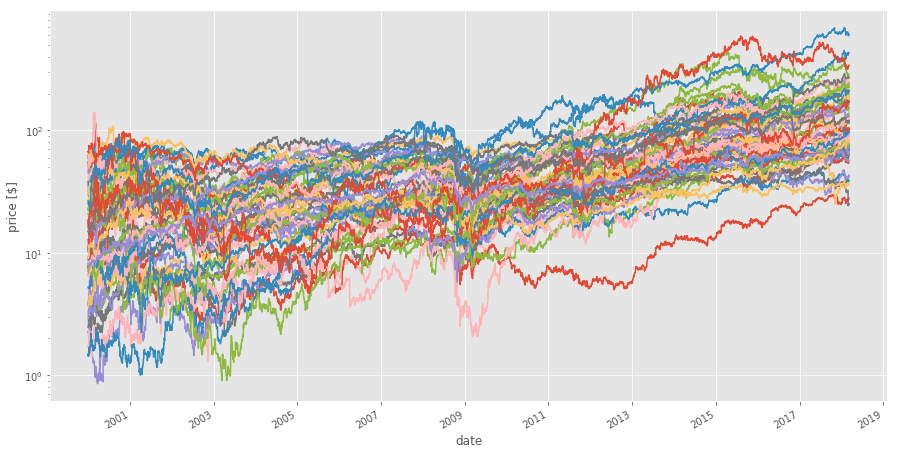

In [9]:
# plot the prices on a log scale

figsize(15,8)
C.plot(grid=True, legend=False, logy=True) # turning off the legend is wise here as it would take quite some space
xlabel('date')
ylabel('price [$]')

## Save data to file

`HistData` class can save data to HDF5 for later use:


In [10]:
hData.to_hdf('data/healthcare.h5', key='healthcare')

## Load data from file

HDF5 data container is great for saving large datasets, because of its fast loading speed.
See [pandas doc](https://pandas.pydata.org/pandas-docs/stable/io.html#hdf5-pytables)


[ref]: # (data io - hdf5)

Reload data from file:

In [11]:
data = pd.read_hdf('data/healthcare.h5','healthcare')
data

symbol          A                                            ABBV          \
ohlcv        open   high    low  close adj_close   volume    open    high   
Date                                                                        
1999-12-31  56.87  57.18  54.54  55.30     49.07  1931100     NaN     NaN   
2000-01-03  56.33  56.46  48.19  51.50     45.69  4674300     NaN     NaN   
2000-01-04  48.73  49.27  46.32  47.57     42.20  4765000     NaN     NaN   
2000-01-05  47.39  47.57  43.14  44.62     39.59  5758600     NaN     NaN   
2000-01-06  44.08  44.35  41.58  42.92     38.08  2534400     NaN     NaN   
...           ...    ...    ...    ...       ...      ...     ...     ...   
2018-03-02  66.82  67.68  66.65  67.51     67.51  2057300  112.94  115.47   
2018-03-05  67.25  67.85  66.51  67.55     67.55  1890900  114.00  116.32   
2018-03-06  67.78  68.42  67.45  68.11     68.11  2944600  116.01  116.30   
2018-03-07  67.36  69.86  67.30  69.70     69.70  3125800  112.58  114.99   
2018-03-08  69.72  70.27  69.19  69.85     69.85  2365900  115.00  117.75   

symbol                        ...        ZBH                              \
ohlcv          low   close    ...        low   close adj_close    volume   
Date                          ...                                          
1999-12-31     NaN     NaN    ...        NaN     NaN       NaN       NaN   
2000-01-03     NaN     NaN    ...        NaN     NaN       NaN       NaN   
2000-01-04     NaN     NaN    ...        NaN     NaN       NaN       NaN   
2000-01-05     NaN     NaN    ...        NaN     NaN       NaN       NaN   
2000-01-06     NaN     NaN    ...        NaN     NaN       NaN       NaN   
...            ...     ...    ...        ...     ...       ...       ...   
2018-03-02  111.89  115.04    ...     113.01  117.05    117.05  1.18e+06   
2018-03-05  112.89  115.66    ...     116.26  118.13    118.13  1.05e+06   
2018-03-06  113.83  114.56    ...     116.93  118.09    118.09  1.11e+06   
2018-03-07  112.21  114.72    ...     117.33  121.00    121.00  1.35e+06   
2018-03-08  114.35  117.01    ...     119.71  120.21    120.21  1.18e+06   

symbol        ZTS                                           
ohlcv        open   high    low  close adj_close    volume  
Date                                                        
1999-12-31    NaN    NaN    NaN    NaN       NaN       NaN  
2000-01-03    NaN    NaN    NaN    NaN       NaN       NaN  
2000-01-04    NaN    NaN    NaN    NaN       NaN       NaN  
2000-01-05    NaN    NaN    NaN    NaN       NaN       NaN  
2000-01-06    NaN    NaN    NaN    NaN       NaN       NaN  
...           ...    ...    ...    ...       ...       ...  
2018-03-02  79.93  81.50  79.86  81.28     81.28  2.03e+06  
2018-03-05  81.01  82.57  80.70  81.89     81.89  2.15e+06  
2018-03-06  82.00  82.14  80.93  81.51     81.51  2.10e+06  
2018-03-07  80.98  81.96  80.97  81.76     81.76  2.88e+06  
2018-03-08  82.00  82.85  81.93  82.54     82.54  2.19e+06  

[4575 rows x 366 columns]